In [1]:
# plotly and other data visualization tools rely on numpy arrays so import the numpy class
import numpy as np
import matplotlib.pyplot as plt
# grabs the information from other files like mat files
import scipy.io as sio
# create string value to mat file
matPath = 'data/2017_Pervious11_F5.mat'
# load the information in the file in a format that python can interpret
matfile = sio.loadmat(matPath)

# in order: for slab1 get date_time, rn, qh,qe,qg and sup
# s1_dates = matfile['S1']['D']
# manually make strings for the time intervals
days = ['20','21','22']
years = ['2017']
months = ['Jul']
# intialize all of the arrays that are going to be used to store all of the values
s1_dates, s1_rn, s1_sup, s1_sdn, s1_lup, s1_ldn, s3_rn, s4_rn, s6_rn, s8_rn, s1_rain  = [],[],[],[],[],[],[],[],[],[],[]
s1_amb, s1_st1, s1_st2, s1_st3, s1_st4, s1_usp, s1_soilt = [],[],[],[],[],[],[]
s1_e1, s1_e3, s1_e4, s1_vwc3, s1_vwc6, s1_ws, s1_bp, s1_rh = [],[],[],[],[],[],[],[]
s2_amb, s2_st1, s2_st2, s2_st3, s2_st4, s2_usp = [],[],[],[],[],[]
s3_amb, s3_st1, s3_st2, s3_st3, s3_st4, s3_usp = [],[],[],[],[],[]
s4_amb, s4_st1, s4_st2, s4_st3, s4_st4, s4_usp = [],[],[],[],[],[]
s5_amb, s5_st1, s5_st2, s5_st3, s5_st4, s5_usp = [],[],[],[],[],[]
s6_amb, s6_st1, s6_st2, s6_st3, s6_st4, s6_usp = [],[],[],[],[],[]
s7_amb, s7_st1, s7_st2, s7_st3, s7_st4, s7_usp = [],[],[],[],[],[]
s8_amb, s8_st1, s8_st2, s8_st3, s8_st4, s8_usp = [],[],[],[],[],[]
s1_mh2o, s2_mh2o, s3_mh2o, s4_mh2o, s5_mh2o, s6_mh2o, s7_mh2o, s8_mh2o = [],[],[],[],[],[],[],[]

# if you want to expand, make more loops within the range of each parameter
# for months and years, 0 is only needed because there is only 1 value
for j in range(len(days)):
    for i in range(24): 
        s1_dates.append(days[j]+'-'+months[0]+'-'+years[0]+'-'+str(i)+':00:00')
s1_dates.append('23-Jul-2017-0:00:00')

# in the matfile, the values collected from Jul20 - Jul22 are within range 1440-576
for k in range(576,1452,12):
    # ts = temporary sum, these are used to hold the sums of a specified value for each hour since the data is currently spread in 5 minute intervals
    ts_s1_rn, ts_s1_sup, ts_s1_sdn, ts_s1_lup, ts_s1_ldn, ts_s3_rn, ts_s4_rn, ts_s6_rn, ts_s8_rn, ts_s1_rain = 0,0,0,0,0,0,0,0,0,0
    ts_s1_amb, ts_s1_st1, ts_s1_st2, ts_s1_st3, ts_s1_st4, ts_s1_usp, ts_s1_soilt = 0,0,0,0,0,0,0
    ts_s1_e1, ts_s1_e3, ts_s1_e4, ts_s1_vwc3, ts_s1_vwc6, ts_s1_ws, ts_s1_bp, ts_s1_rh = 0,0,0,0,0,0,0,0 
    ts_s2_amb, ts_s2_st1, ts_s2_st2, ts_s2_st3, ts_s2_st4, ts_s2_usp = 0,0,0,0,0,0
    ts_s3_amb, ts_s3_st1, ts_s3_st2, ts_s3_st3, ts_s3_st4, ts_s3_usp = 0,0,0,0,0,0
    ts_s4_amb, ts_s4_st1, ts_s4_st2, ts_s4_st3, ts_s4_st4, ts_s4_usp = 0,0,0,0,0,0
    ts_s5_amb, ts_s5_st1, ts_s5_st2, ts_s5_st3, ts_s5_st4, ts_s5_usp = 0,0,0,0,0,0
    ts_s6_amb, ts_s6_st1, ts_s6_st2, ts_s6_st3, ts_s6_st4, ts_s6_usp = 0,0,0,0,0,0
    ts_s7_amb, ts_s7_st1, ts_s7_st2, ts_s7_st3, ts_s7_st4, ts_s7_usp = 0,0,0,0,0,0
    ts_s8_amb, ts_s8_st1, ts_s8_st2, ts_s8_st3, ts_s8_st4, ts_s8_usp = 0,0,0,0,0,0
    ts_s1_mh2o, ts_s2_mh2o, ts_s3_mh2o, ts_s4_mh2o, ts_s5_mh2o, ts_s6_mh2o, ts_s7_mh2o, ts_s8_mh2o = 0,0,0,0,0,0,0,0
    # add up the values collected for each hour within each parameter
    for l in range(0,12):
        ts_s1_rn += float(matfile['S1']['RN'][0][0][k+l][0])
        ts_s3_rn += float(matfile['S3']['RN'][0][0][k+l][0])
        ts_s4_rn += float(matfile['S4']['RN'][0][0][k+l][0])
        ts_s6_rn += float(matfile['S6']['RN'][0][0][k+l][0])
        ts_s8_rn += float(matfile['S8']['RN'][0][0][k+l][0])
        ts_s1_sup += float(matfile['S1']['SUP'][0][0][k+l][0])
        ts_s1_sdn += float(matfile['S1']['SDN'][0][0][0][k+l])
        ts_s1_lup += float(matfile['S1']['LUP'][0][0][k+l][0])
        ts_s1_ldn += float(matfile['S1']['LDN'][0][0][k+l][0])
        ts_s1_rain += float(matfile['S1']['RAIN'][0][0][k+l][0])
        ts_s1_amb += float(matfile['S1']['AMB'][0][0][k+l][0])
        ts_s2_amb += float(matfile['S2']['AMB'][0][0][k+l][0])
        ts_s3_amb += float(matfile['S3']['AMB'][0][0][k+l][0])
        ts_s4_amb += float(matfile['S4']['AMB'][0][0][k+l][0])
        ts_s5_amb += float(matfile['S5']['AMB'][0][0][k+l][0])
        ts_s6_amb += float(matfile['S6']['AMB'][0][0][k+l][0])
        ts_s7_amb += float(matfile['S7']['AMB'][0][0][k+l][0])
        ts_s8_amb += float(matfile['S8']['AMB'][0][0][k+l][0])
        ts_s1_soilt += float(matfile['S1']['SOILT'][0][0][k+l][0])
        ts_s1_st1 += float(matfile['S1']['ST1'][0][0][k+l][0])
        ts_s2_st1 += float(matfile['S2']['ST1'][0][0][k+l][0])
        ts_s3_st1 += float(matfile['S3']['ST1'][0][0][k+l][0])
        ts_s4_st1 += float(matfile['S4']['ST1'][0][0][k+l][0])
        ts_s5_st1 += float(matfile['S5']['ST1'][0][0][k+l][0])
        ts_s6_st1 += float(matfile['S6']['ST1'][0][0][k+l][0])
        ts_s7_st1 += float(matfile['S7']['ST1'][0][0][k+l][0])
        ts_s8_st1 += float(matfile['S8']['ST1'][0][0][k+l][0])
        ts_s1_st2 += float(matfile['S1']['ST2'][0][0][k+l][0])
        ts_s2_st2 += float(matfile['S2']['ST2'][0][0][k+l][0])
        ts_s3_st2 += float(matfile['S3']['ST2'][0][0][k+l][0])
        ts_s4_st2 += float(matfile['S4']['ST2'][0][0][k+l][0])
        ts_s5_st2 += float(matfile['S5']['ST2'][0][0][k+l][0])
        ts_s6_st2 += float(matfile['S6']['ST2'][0][0][k+l][0])
        ts_s7_st2 += float(matfile['S7']['ST2'][0][0][k+l][0])
        ts_s8_st2 += float(matfile['S8']['ST2'][0][0][k+l][0])
        ts_s1_st3 += float(matfile['S1']['ST3'][0][0][k+l][0])
        ts_s2_st3 += float(matfile['S2']['ST3'][0][0][k+l][0])
        ts_s3_st3 += float(matfile['S3']['ST3'][0][0][k+l][0])
        ts_s4_st3 += float(matfile['S4']['ST3'][0][0][k+l][0])
        ts_s5_st3 += float(matfile['S5']['ST3'][0][0][k+l][0])
        ts_s6_st3 += float(matfile['S6']['ST3'][0][0][k+l][0])
        ts_s7_st3 += float(matfile['S7']['ST3'][0][0][k+l][0])
        ts_s8_st3 += float(matfile['S8']['ST3'][0][0][k+l][0])
        ts_s1_st4 += float(matfile['S1']['ST4'][0][0][k+l][0])
        ts_s2_st4 += float(matfile['S2']['ST4'][0][0][k+l][0])
        ts_s3_st4 += float(matfile['S3']['ST4'][0][0][k+l][0])
        ts_s4_st4 += float(matfile['S4']['ST4'][0][0][k+l][0])
        ts_s5_st4 += float(matfile['S5']['ST4'][0][0][k+l][0])
        ts_s6_st4 += float(matfile['S6']['ST4'][0][0][k+l][0])
        ts_s7_st4 += float(matfile['S7']['ST4'][0][0][k+l][0])
        ts_s8_st4 += float(matfile['S8']['ST4'][0][0][k+l][0])
        ts_s1_usp += float(matfile['S1']['USP'][0][0][k+l][0])
        ts_s2_usp += float(matfile['S2']['USP'][0][0][k+l][0])
        ts_s3_usp += float(matfile['S3']['USP'][0][0][k+l][0])
        ts_s4_usp += float(matfile['S4']['USP'][0][0][k+l][0])
        ts_s5_usp += float(matfile['S5']['USP'][0][0][k+l][0])
        ts_s6_usp += float(matfile['S6']['USP'][0][0][k+l][0])
        ts_s7_usp += float(matfile['S7']['USP'][0][0][k+l][0])
        ts_s8_usp += float(matfile['S8']['USP'][0][0][k+l][0])
        ts_s1_e1 += float(matfile['S1']['E1'][0][0][k+l][0])
        ts_s1_e3 += float(matfile['S1']['E3'][0][0][k+l][0])
        ts_s1_e4 += float(matfile['S1']['E4'][0][0][k+l][0])
        ts_s1_vwc3 += float(matfile['S1']['VWC3'][0][0][0][k+l])
        ts_s1_vwc6 += float(matfile['S1']['VWC6'][0][0][0][k+l])
        ts_s1_ws += float(matfile['S1']['WS'][0][0][k+l][0])
        ts_s1_bp += float(matfile['S1']['BP'][0][0][k+l][0])
        ts_s1_mh2o += float(matfile['S1']['MH2O'][0][0][k+1][0])
        ts_s2_mh2o += float(matfile['S2']['MH2O'][0][0][0][k+l])
        ts_s3_mh2o += float(matfile['S3']['MH2O'][0][0][k+1][0])
        ts_s4_mh2o += float(matfile['S4']['MH2O'][0][0][k+1][0])
        ts_s5_mh2o += float(matfile['S5']['MH2O'][0][0][0][k+1])
        ts_s6_mh2o += float(matfile['S6']['MH2O'][0][0][k+1][0])
        ts_s7_mh2o += float(matfile['S7']['MH2O'][0][0][0][k+1])
        ts_s8_mh2o += float(matfile['S8']['MH2O'][0][0][k+1][0])
        ts_s1_rh += float(matfile['S1']['RH'][0][0][k+1][0])
        
    # place the average for each parameter in the list for each parameter
    s1_rn.append(ts_s1_rn/12)
    s3_rn.append(ts_s3_rn/12)
    s4_rn.append(ts_s4_rn/12)
    s6_rn.append(ts_s6_rn/12)
    s8_rn.append(ts_s8_rn/12)
    s1_sup.append(ts_s1_sup/12)
    s1_sdn.append(ts_s1_sdn/12)
    s1_lup.append(ts_s1_lup/12)
    s1_ldn.append(ts_s1_ldn/12)
    s1_rain.append(ts_s1_rain/12)
    s1_amb.append(ts_s1_amb/12)
    s2_amb.append(ts_s2_amb/12)
    s3_amb.append(ts_s3_amb/12)
    s4_amb.append(ts_s4_amb/12)
    s5_amb.append(ts_s5_amb/12)
    s6_amb.append(ts_s6_amb/12)
    s7_amb.append(ts_s7_amb/12)
    s8_amb.append(ts_s8_amb/12)
    s1_st1.append(ts_s1_st1/12)
    s1_st2.append(ts_s1_st2/12)
    s1_st3.append(ts_s1_st3/12)
    s1_st4.append(ts_s1_st4/12)
    s1_usp.append(ts_s1_usp/12)
    s1_soilt.append(ts_s1_soilt/12)
    s2_st1.append(ts_s2_st1/12)
    s2_st2.append(ts_s2_st2/12)
    s2_st3.append(ts_s2_st3/12)
    s2_st4.append(ts_s2_st4/12)
    s2_usp.append(ts_s2_usp/12)
    s3_st1.append(ts_s3_st1/12)
    s3_st2.append(ts_s3_st2/12)
    s3_st3.append(ts_s3_st3/12)
    s3_st4.append(ts_s3_st4/12)
    s3_usp.append(ts_s3_usp/12)
    s4_st1.append(ts_s4_st1/12)
    s4_st2.append(ts_s4_st2/12)
    s4_st3.append(ts_s4_st3/12)
    s4_st4.append(ts_s4_st4/12)
    s4_usp.append(ts_s4_usp/12)
    s5_st1.append(ts_s5_st1/12)
    s5_st2.append(ts_s5_st2/12)
    s5_st3.append(ts_s5_st3/12)
    s5_st4.append(ts_s5_st4/12)
    s5_usp.append(ts_s5_usp/12)
    s6_st1.append(ts_s6_st1/12)
    s6_st2.append(ts_s6_st2/12)
    s6_st3.append(ts_s6_st3/12)
    s6_st4.append(ts_s6_st4/12)
    s6_usp.append(ts_s6_usp/12)
    s7_st1.append(ts_s7_st1/12)
    s7_st2.append(ts_s7_st2/12)
    s7_st3.append(ts_s7_st3/12)
    s7_st4.append(ts_s7_st4/12)
    s7_usp.append(ts_s7_usp/12)
    s8_st1.append(ts_s8_st1/12)
    s8_st2.append(ts_s8_st2/12)
    s8_st3.append(ts_s8_st3/12)
    s8_st4.append(ts_s8_st4/12)
    s8_usp.append(ts_s8_usp/12)
    s1_e1.append(ts_s1_e1/12)
    s1_e3.append(ts_s1_e3/12)
    s1_e4.append(ts_s1_e4/12)
    s1_vwc3.append(ts_s1_vwc3/12)
    s1_vwc6.append(ts_s1_vwc6/12)
    s1_ws.append(ts_s1_ws/12)
    s1_bp.append(ts_s1_bp/12)  
    s1_mh2o.append(ts_s1_mh2o/12) 
    s2_mh2o.append(ts_s2_mh2o/12) 
    s3_mh2o.append(ts_s3_mh2o/12) 
    s4_mh2o.append(ts_s4_mh2o/12) 
    s5_mh2o.append(ts_s5_mh2o/12) 
    s6_mh2o.append(ts_s6_mh2o/12) 
    s7_mh2o.append(ts_s7_mh2o/12) 
    s8_mh2o.append(ts_s8_mh2o/12)
    s1_rh.append(ts_s1_rh/12)
# convert all of the lists generated before into numpy arrays so that they can be graphed
np_dates = np.array(s1_dates)
np_s1_rn = np.array(s1_rn)
np_s1_sup = np.array(s1_sup)
np_s1_sdn = np.array(s1_sdn)
np_s1_lup = np.array(s1_lup)
np_s1_ldn = np.array(s1_ldn)
np_s3_rn = np.array(s3_rn)
np_s4_rn = np.array(s4_rn)
np_s6_rn = np.array(s6_rn)
np_s8_rn = np.array(s8_rn)
np_s1_rain = np.array(s1_rain)
np_s1_amb = np.array(s1_amb)
np_s2_amb = np.array(s2_amb)
np_s3_amb = np.array(s3_amb)
np_s4_amb = np.array(s4_amb)
np_s5_amb = np.array(s5_amb)
np_s6_amb = np.array(s6_amb)
np_s7_amb = np.array(s7_amb)
np_s8_amb = np.array(s8_amb)
np_s1_st1 = np.array(s1_st1)
np_s1_st2 = np.array(s1_st2)
np_s1_st3 = np.array(s1_st3)
np_s1_st4 = np.array(s1_st4)
np_s1_usp = np.array(s1_usp)
np_s1_soilt = np.array(s1_soilt)
np_s2_st1 = np.array(s2_st1)
np_s2_st2 = np.array(s2_st2)
np_s2_st3 = np.array(s2_st3)
np_s2_st4 = np.array(s2_st4)
np_s2_usp = np.array(s2_usp)
np_s3_st1 = np.array(s3_st1)
np_s3_st2 = np.array(s3_st2)
np_s3_st3 = np.array(s3_st3)
np_s3_st4 = np.array(s3_st4)
np_s3_usp = np.array(s3_usp)
np_s4_st1 = np.array(s4_st1)
np_s4_st2 = np.array(s4_st2)
np_s4_st3 = np.array(s4_st3)
np_s4_st4 = np.array(s4_st4)
np_s4_usp = np.array(s4_usp)
np_s5_st1 = np.array(s5_st1)
np_s5_st2 = np.array(s5_st2)
np_s5_st3 = np.array(s5_st3)
np_s5_st4 = np.array(s5_st4)
np_s5_usp = np.array(s5_usp)
np_s6_st1 = np.array(s6_st1)
np_s6_st2 = np.array(s6_st2)
np_s6_st3 = np.array(s6_st3)
np_s6_st4 = np.array(s6_st4)
np_s6_usp = np.array(s6_usp)
np_s7_st1 = np.array(s7_st1)
np_s7_st2 = np.array(s7_st2)
np_s7_st3 = np.array(s7_st3)
np_s7_st4 = np.array(s7_st4)
np_s7_usp = np.array(s7_usp)
np_s8_st1 = np.array(s8_st1)
np_s8_st2 = np.array(s8_st2)
np_s8_st3 = np.array(s8_st3)
np_s8_st4 = np.array(s8_st4)
np_s8_usp = np.array(s8_usp)
np_s1_e1 = np.array(s1_e1)
np_s1_e3 = np.array(s1_e3)
np_s1_e4 = np.array(s1_e4)
np_s1_vwc3 = np.array(s1_vwc3)
np_s1_vwc6 = np.array(s1_vwc6)
np_s1_ws = np.array(s1_ws)
np_s1_bp = np.array(s1_bp)
np_s1_mh2o = np.array(s1_mh2o) 
np_s2_mh2o = np.array(s2_mh2o) 
np_s3_mh2o = np.array(s3_mh2o) 
np_s4_mh2o = np.array(s4_mh2o) 
np_s5_mh2o = np.array(s5_mh2o) 
np_s6_mh2o = np.array(s6_mh2o) 
np_s7_mh2o = np.array(s7_mh2o) 
np_s8_mh2o = np.array(s8_mh2o)
np_s1_rh = np.array(s1_rh)
x = []
xlabels = []
xticks = []
xlim = (0,72)
for i in range(73): x.append(i)
for k in range(0,73,12): xticks.append(k)
for j in range(0,73,12): xlabels.append(np_dates[j])

C:\Users\mattanderson\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\io\matlab\mio.py:136: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


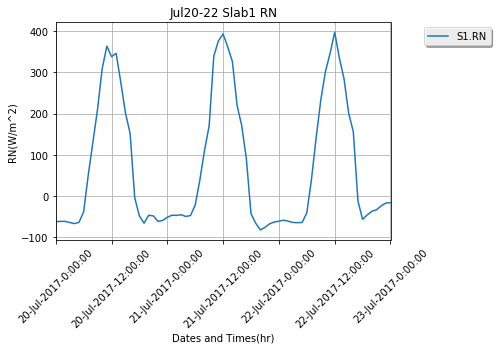

In [7]:
# Slab 1 Natural Radiation Plot 
fig1 = plt.plot(x, np_s1_rn, label='S1.RN')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), shadow=True, ncol=1)
plt.xlim(xlim)
plt.xticks(xticks, xlabels, rotation= 45)
plt.xlabel('Dates and Times(hr)')
plt.ylabel('RN(W/m^2)')
plt.title('Jul20-22 Slab1 RN')
plt.grid(True)
plt.show()

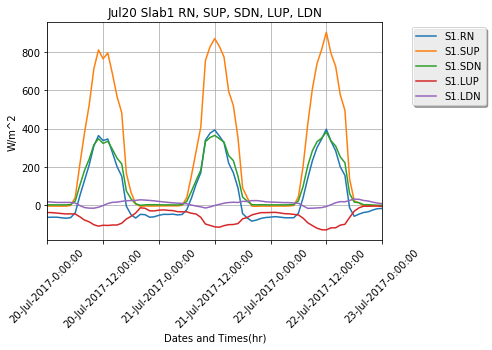

In [8]:
fig1 = plt.plot(x, np_s1_rn, label='S1.RN')
fig2 = plt.plot(x, np_s1_sup, label='S1.SUP')
fig3 = plt.plot(x, np_s1_sdn, label='S1.SDN')
fig4 = plt.plot(x, np_s1_lup, label='S1.LUP')
fig5 = plt.plot(x, np_s1_ldn, label='S1.LDN')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), shadow=True, ncol=1)
plt.xlim(xlim)
plt.xticks(xticks, xlabels, rotation= 45)
plt.xlabel('Dates and Times(hr)')
plt.ylabel('W/m^2')
plt.title('Jul20 Slab1 RN, SUP, SDN, LUP, LDN')
plt.grid(True)
plt.show()

In [4]:
# Set layout for the plot
layout8 = dict(
    title = 'Jul20-22 S1, S3, S4, S6, S8 RN',
    xaxis = dict(
        title = 'Dates and Times(hr)',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickangle = 45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    ),
    yaxis = dict(
        title = 'RN',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickangle = 45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    ),
)

fig8 = dict(data=data8, layout=layout8)
py.iplot(fig8, filename='S1RN_S3RN_S4RN_S6RN_S8RN')

In [10]:
# Set layout for the plot
layout9 = dict(
    title = 'Jul20-22 S1 RAIN',
    xaxis = dict(
        title = 'Dates and Times(hr)',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickangle = 45,
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    ),
    yaxis = dict(
        title = 'RN(W/m^2)',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    )
)

fig9 = dict(data=data9, layout=layout9)
py.iplot(fig9, filename='S1RAIN')

PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

In [11]:
layout12 = dict(
    title = 'Slab1 thermocouples',
    xaxis = dict(
        title = 'Dates and Times(hr)',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickangle = 45,
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    ),
    yaxis = dict(
        title = 'DegC',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    )
)

fig12 = dict(data=data12, layout=layout12)
py.iplot(fig12, filename='S1Thermocouples')

In [4]:
layout13 = dict(
    title = 'Slab2 thermocouples',
    xaxis = dict(
        title = 'Dates and Times(hr)',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickangle = 45,
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    ),
    yaxis = dict(
        title = 'DegC',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    )
)

fig13 = dict(data=data13, layout=layout13)
py.iplot(fig13, filename='S2Thermocouples')

In [6]:
layout14 = dict(
    title = 'Slab3 thermocouples',
    xaxis = dict(
        title = 'Dates and Times(hr)',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickangle = 45,
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    ),
    yaxis = dict(
        title = 'DegC',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    )
)

fig14 = dict(data=data14, layout=layout14)
py.iplot(fig14, filename='S3Thermocouples')

In [7]:
layout15 = dict(
    title = 'Slab4 thermocouples',
    xaxis = dict(
        title = 'Dates and Times(hr)',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickangle = 45,
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    ),
    yaxis = dict(
        title = 'DegC',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    )
)

fig15 = dict(data=data15, layout=layout15)
py.iplot(fig15, filename='S4Thermocouples')

In [9]:
layout16 = dict(
    title = 'Slab1 thermocouples',
    xaxis = dict(
        title = 'Dates and Times(hr)',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickangle = 45,
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    ),
    yaxis = dict(
        title = 'DegC',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    )
)

fig16 = dict(data=data16, layout=layout16)
py.iplot(fig16, filename='S5Thermocouples')

In [10]:
layout17 = dict(
    title = 'Slab6 thermocouples',
    xaxis = dict(
        title = 'Dates and Times(hr)',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickangle = 45,
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    ),
    yaxis = dict(
        title = 'DegC',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    )
)

fig17 = dict(data=data17, layout=layout17)
py.iplot(fig17, filename='S6Thermocouples')

In [11]:
layout18 = dict(
    title = 'Slab7 thermocouples',
    xaxis = dict(
        title = 'Dates and Times(hr)',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickangle = 45,
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    ),
    yaxis = dict(
        title = 'DegC',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    )
)

fig18 = dict(data=data18, layout=layout18)
py.iplot(fig18, filename='S7Thermocouples')

In [12]:
layout19 = dict(
    title = 'Slab8 thermocouples',
    xaxis = dict(
        title = 'Dates and Times(hr)',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickangle = 45,
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    ),
    yaxis = dict(
        title = 'DegC',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    )
)

fig19 = dict(data=data19, layout=layout19)
py.iplot(fig19, filename='S8Thermocouples')

In [14]:
layout20 = dict(
    title = 'Slabs1-8 ST1',
    xaxis = dict(
        title = 'Dates and Times(hr)',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickangle = 45,
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    ),
    yaxis = dict(
        title = 'DegC',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    )
)

fig20 = dict(data=data20, layout=layout20)
py.iplot(fig20, filename='Slabs1-8 ST1')

In [15]:
layout23 = dict(
    title = 'S1 AMB and E1',
    xaxis = dict(
        title = 'Dates and Times(hr)',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickangle = 45,
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    ),
    yaxis = dict(
        title = 'DegC',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    )
)

fig23 = dict(data=data23, layout=layout23)
py.iplot(fig23, filename='S1 AMB and E1')


In [16]:
layout24 = dict(
    title = 'Sl AMB E1 USP and SOILT3',
    xaxis = dict(
        title = 'Dates and Times(hr)',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickangle = 45,
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    ),
    yaxis = dict(
        title = 'DegC',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    )
)

fig24 = dict(data=data24, layout=layout24)
py.iplot(fig24, filename='S1 AMB E1 USP and SOILT3')

In [17]:
layout25 = dict(
    title = 'S1 AMB E1 E3 and E4',
    xaxis = dict(
        title = 'Dates and Times(hr)',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickangle = 45,
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    ),
    yaxis = dict(
        title = 'DegC',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    )
)

fig25 = dict(data=data25, layout=layout25)
py.iplot(fig25, filename='S1 AMB E1 E3 and E4')

In [18]:
layout26 = dict(
    title = 'S1 AMB and S3 USP',
    xaxis = dict(
        title = 'Dates and Times(hr)',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickangle = 45,
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    ),
    yaxis = dict(
        title = 'DegC',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    )
)

fig26 = dict(data=data26, layout=layout26)
py.iplot(fig26, filename='S1 AMB and S3 USP')

In [5]:
layout32 = dict(
    title = 'TDR',
    xaxis = dict(
        title = 'Dates and Times(hr)',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickangle = 45,
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    ),
    yaxis = dict(
        title = 'mbar',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    )
)

fig32 = dict(data=data32, layout=layout32)
py.iplot(fig32, filename='TDR')

In [6]:
layout35 = dict(
    title = 'TDR',
    xaxis = dict(
        title = 'Dates and Times(hr)',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickangle = 45,
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    ),
    yaxis = dict(
        title = 'm/s',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    )
)

fig35 = dict(data=data35, layout=layout35)
py.iplot(fig35, filename='WS')

In [7]:
layout38 = dict(
    title = 'Barometric Pressure',
    xaxis = dict(
        title = 'Dates and Times(hr)',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickangle = 45,
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    ),
    yaxis = dict(
        title = 'in',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    )
)

fig38 = dict(data=data38, layout=layout38)
py.iplot(fig38, filename='BP')

In [8]:
layout41 = dict(
    title = 'Relative Humidity',
    xaxis = dict(
        title = 'Dates and Times(hr)',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickangle = 45,
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    ),
    yaxis = dict(
        title = '%',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    )
)

fig41 = dict(data=data41, layout=layout41)
py.iplot(fig41, filename='RH')

In [4]:
layout44 = dict(
    title = 'Slab1 mh2o and rain',
    xaxis = dict(
        title = 'Dates and Times(hr)',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickangle = 45,
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    ),
    yaxis = dict(
        title = 'mm',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    )
)

fig44 = dict(data=data44, layout=layout44)
py.iplot(fig44, filename='S1_MH2O')

In [6]:
layout45 = dict(
    title = 'Slab2 mh2o',
    xaxis = dict(
        title = 'Dates and Times(hr)',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickangle = 45,
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    ),
    yaxis = dict(
        title = 'mm',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    )
)

fig45 = dict(data=data45, layout=layout45)
py.iplot(fig45, filename='S2_MH2O')

In [7]:
layout46 = dict(
    title = 'Slab3 mh2o',
    xaxis = dict(
        title = 'Dates and Times(hr)',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickangle = 45,
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    ),
    yaxis = dict(
        title = 'mm',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    )
)

fig46 = dict(data=data46, layout=layout46)
py.iplot(fig46, filename='S3_MH2O')

In [4]:
layout47 = dict(
    title = 'Slab4 mh2o',
    xaxis = dict(
        title = 'Dates and Times(hr)',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickangle = 45,
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    ),
    yaxis = dict(
        title = 'mm',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    )
)

fig47 = dict(data=data47, layout=layout47)
py.iplot(fig47, filename='S4_MH2O')

In [5]:
layout48 = dict(
    title = 'Slab5 mh2o',
    xaxis = dict(
        title = 'Dates and Times(hr)',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickangle = 45,
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    ),
    yaxis = dict(
        title = 'mm',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    )
)

fig48 = dict(data=data48, layout=layout48)
py.iplot(fig48, filename='S5_MH2O')

In [3]:
layout49 = dict(
    title = 'Slab6 mh2o',
    xaxis = dict(
        title = 'Dates and Times(hr)',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickangle = 45,
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    ),
    yaxis = dict(
        title = 'mm',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    )
)

fig49 = dict(data=data49, layout=layout49)
py.iplot(fig48, filename='S6_MH2O')

In [4]:
layout50 = dict(
    title = 'Slab7 mh2o',
    xaxis = dict(
        title = 'Dates and Times(hr)',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickangle = 45,
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    ),
    yaxis = dict(
        title = 'mm',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    )
)

fig50 = dict(data=data50, layout=layout50)
py.iplot(fig50, filename='S7_MH2O')

In [5]:
layout51 = dict(
    title = 'Slab8 mh2o',
    xaxis = dict(
        title = 'Dates and Times(hr)',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickangle = 45,
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    ),
    yaxis = dict(
        title = 'mm',
        titlefont=dict(
            family='Old Standard TT, serif',
            size=12,
            color='black'
        ),
        tickfont = dict(
            family='Old Standard TT, serif',
            size=8,
            color='black'
        )
    )
)

fig51 = dict(data=data51, layout=layout51)
py.iplot(fig51, filename='S8_MH2O')